Import everything needed and data.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics
import itertools

sns.set_style('whitegrid')

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
anime = pd.read_csv('anime.csv')
ratings = pd.read_csv('rating.csv')

In [3]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [4]:
ratings

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


Explore and clean datasets one at a time

In [5]:
anime.dtypes     #Why are so many columns objects instead of strings? Null values?

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [6]:
anime.genre.isnull().values.any()

True

In [7]:
anime.genre = anime.genre.fillna('Unknown')

In [8]:
anime = anime[anime.genre != 'Unknown']

In [10]:
genre_split = pd.concat([anime.genre.str.get_dummies(sep=", ")], axis=1)

In [11]:
genre_split

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
anime_split_genre = pd.concat([anime, genre_split], axis=1)

In [13]:
anime_split_genre

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,1,1,0,...,0,0,0,0,1,0,0,0,0,0
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
anime_split_genre.type.unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

Since I'm building a recommender for streaming services based on ratings and genre I need to remove the following:
Unknown genres,
Type: OVA's - streaming services typically don't lisence OVA's since they are more costly than a series or movie,
Type: ONA's - these are web based anime also not typically on streaming services,
Type: Music - music videos or music episodes, which like OVA's are costly for the amount of content you are getting,
Genre: Hentai - XXX anime titles won't be a part of the streaming services I'm building this for.
Might end up removing more, however these will be a good start

In [16]:
anime_split_genre = anime_split_genre[anime_split_genre.Hentai != 1]

In [17]:
anime_split_genre.drop('Hentai', axis=1, inplace=True)

/Users/christhekorean/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
anime_split_genre.columns

Index([u'anime_id', u'name', u'genre', u'type', u'episodes', u'rating',
       u'members', u'Action', u'Adventure', u'Cars', u'Comedy', u'Dementia',
       u'Demons', u'Drama', u'Ecchi', u'Fantasy', u'Game', u'Harem',
       u'Historical', u'Horror', u'Josei', u'Kids', u'Magic', u'Martial Arts',
       u'Mecha', u'Military', u'Music', u'Mystery', u'Parody', u'Police',
       u'Psychological', u'Romance', u'Samurai', u'School', u'Sci-Fi',
       u'Seinen', u'Shoujo', u'Shoujo Ai', u'Shounen', u'Shounen Ai',
       u'Slice of Life', u'Space', u'Sports', u'Super Power', u'Supernatural',
       u'Thriller', u'Vampire', u'Yaoi', u'Yuri'],
      dtype='object')

In [19]:
anime_split_genre = anime_split_genre[anime_split_genre.type != 'OVA']
anime_split_genre = anime_split_genre[anime_split_genre.type != 'ONA']
anime_split_genre = anime_split_genre[anime.type != 'Music']

/Users/christhekorean/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [20]:
anime_split_genre.type.value_counts()

TV         3777
Movie      2298
Special    1655
Name: type, dtype: int64

In [21]:
anime_split_genre.shape

(7752, 49)

In [22]:
anime_split_genre.to_csv('animenew.csv', encoding='utf-8')

In [23]:
anime_new = pd.read_csv('animenew.csv')

In [24]:
anime_new

,Unnamed: 0,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,1,0,...,0,0,0,0,0,0,0,0,0,0
5,5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,0,0,...,0,0,0,1,0,0,0,0,0,0
6,6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,1,1,...,0,0,0,0,1,0,0,0,0,0
7,8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109,1,0,...,0,0,0,0,0,0,0,0,0,0
9,10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749,0,0,...,0,1,0,0,0,1,0,0,0,0


In [33]:
anime_new = anime_new.drop('Unnamed: 0', axis=1)

In [34]:
anime_new.columns

Index([u'anime_id', u'name', u'genre', u'type', u'episodes', u'rating',
       u'members', u'Action', u'Adventure', u'Cars', u'Comedy', u'Dementia',
       u'Demons', u'Drama', u'Ecchi', u'Fantasy', u'Game', u'Harem',
       u'Historical', u'Horror', u'Josei', u'Kids', u'Magic', u'Martial Arts',
       u'Mecha', u'Military', u'Music', u'Mystery', u'Parody', u'Police',
       u'Psychological', u'Romance', u'Samurai', u'School', u'Sci-Fi',
       u'Seinen', u'Shoujo', u'Shoujo Ai', u'Shounen', u'Shounen Ai',
       u'Slice of Life', u'Space', u'Sports', u'Super Power', u'Supernatural',
       u'Thriller', u'Vampire', u'Yaoi', u'Yuri'],
      dtype='object')

In [35]:
ratings.shape

(7813737, 3)

In [43]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [44]:
ratings.columns=['user_id', 'anime_id', 'user_rating']

In [46]:
merged = pd.merge(anime_new,ratings, on=['anime_id'])

In [47]:
merged

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,1,0,0,0,0,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,1,0,0,0,0,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,1,0,0,0,0,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,1,0,0,0,0,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,1,0,0,0,0,278,-1
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,1,0,0,0,0,322,10
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,1,0,0,0,0,398,10
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,1,0,0,0,0,462,8
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,1,0,0,0,0,490,10
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,1,0,0,0,0,548,10


In [48]:
merged.to_csv('merged.csv', encoding='utf-8')

In [49]:
merged = pd.read_csv('merged.csv')

In [50]:
merged.head()

,Unnamed: 0,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,...,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,user_id,user_rating
0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,...,0,0,0,1,0,0,0,0,99,5
1,1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,...,0,0,0,1,0,0,0,0,152,10
2,2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,...,0,0,0,1,0,0,0,0,244,10
3,3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,...,0,0,0,1,0,0,0,0,271,10
4,4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,...,0,0,0,1,0,0,0,0,278,-1


In [52]:
ratings_new = merged[['anime_id', 'user_id', 'user_rating']]

In [54]:
ratings_new.to_csv('ratingsnew.csv', encoding='utf-8')

In [55]:
ratings_new = pd.read_csv('ratingsnew.csv')

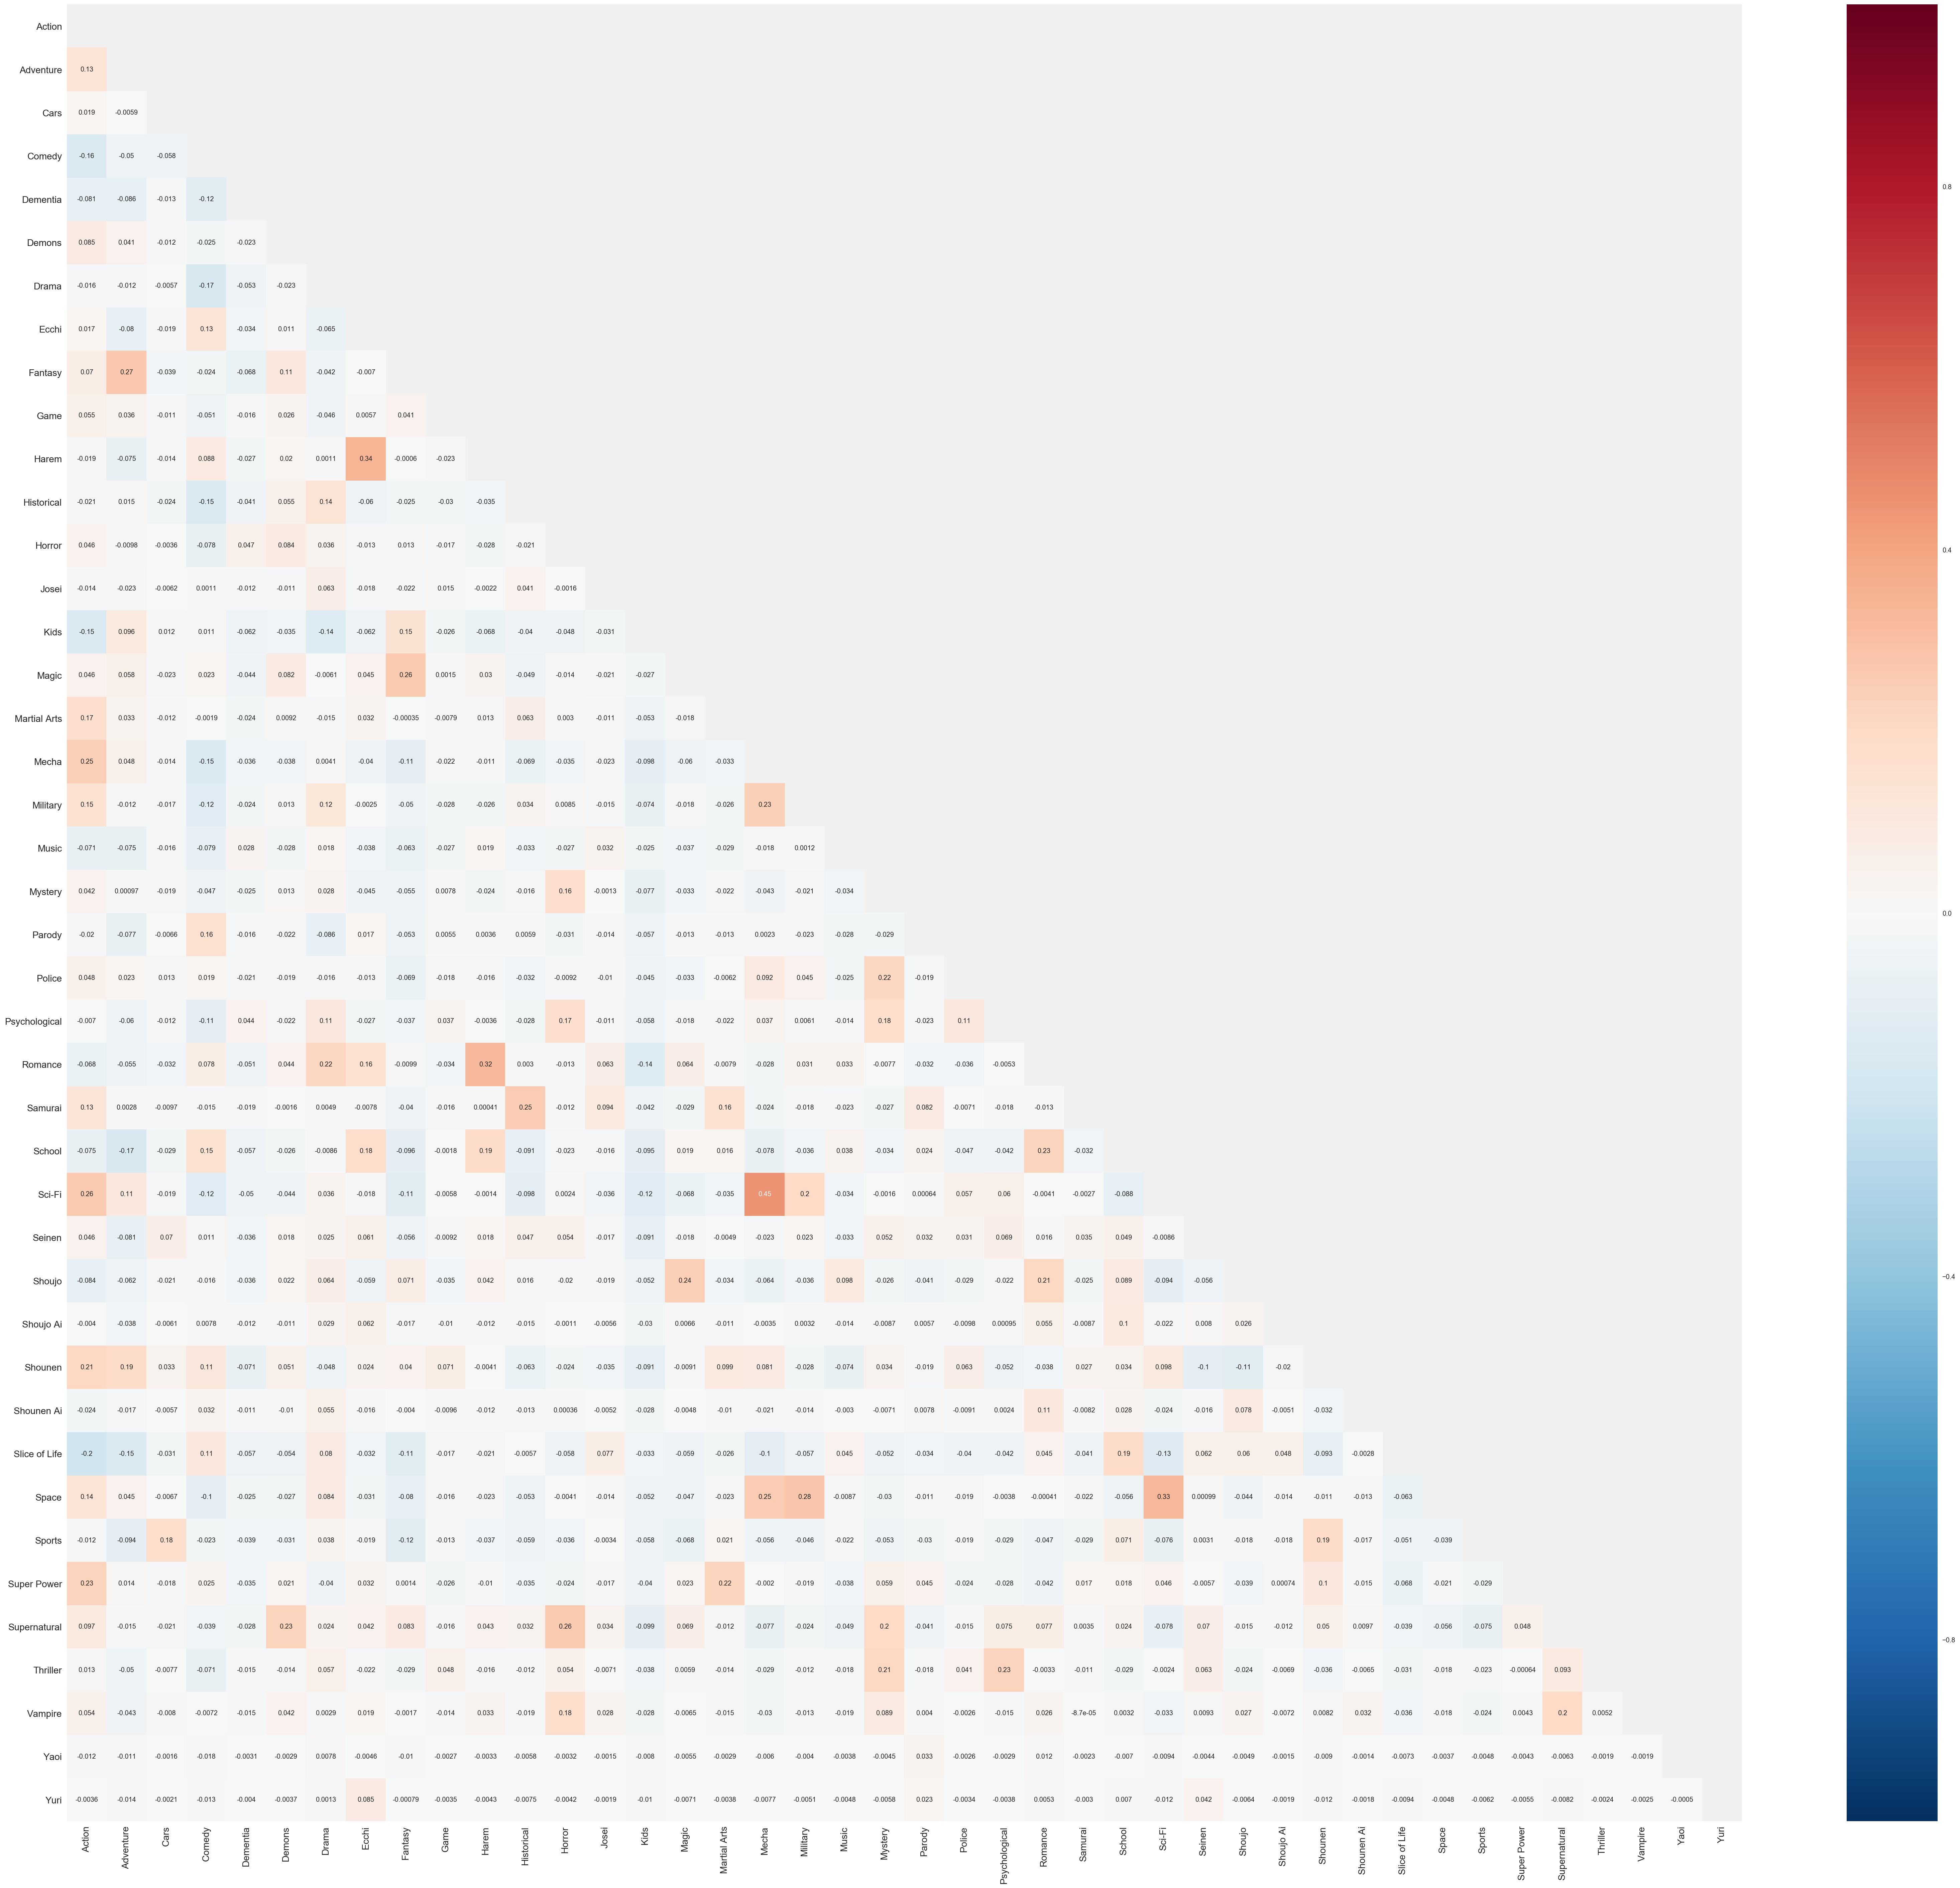

In [75]:
def correlation_heat_map(df):
    corrs = anime_new[['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy',
                        'Game', 'Harem', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha',
                        'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
                        'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life',
                        'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']].corr()

    fig, ax = plt.subplots(figsize=(50,50))

    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    ax = sns.heatmap(corrs, mask=mask, annot=True)

    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    plt.show()
    
correlation_heat_map(anime_new)

As illustrated by the heatmap strongest correlations are: Mecha/Sci-Fi(0.45), Ecchi/Harem(0.34), Sci_Fi/Space(0.33), Harem/Romance(0.32), Military/Space(0.28), Adventure/Fantasy(0.27), Action/Sci-Fi(0.26), Fantasy/Magic(0.26), Horror/Supernatural(0.26), Action/Mecha(0.25), Historical/Samurai(0.25), Mecha/Space(0.25), Magic/Shoujo(0.24), Action/SuperPower(0.23), Demons/Supernatural(0.23), Mecha/Military(0.23), Drama/Romance(0.22), MartialArts/SuperPower(0.22), Mystery/Police(0.22), Action/Shounen(0.21), Mystery/Thriller(0.21), Military/Sci-Fi(0.20), Mystery/Supernatural(0.20)

In [80]:
anime_new[['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem',
            'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery',
            'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo',
            'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural',
            'Thriller', 'Vampire', 'Yaoi', 'Yuri']].plot(kind='pie', figsize=(16,16), subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2e6138b90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x2ea9def90>], dtype=object)

ValueError: Image size of 2158x100645 pixels is too large. It must be less than 2^16 in each direction.